<a href="https://colab.research.google.com/github/rayaneghilene/ENSEA_AI_Labs/blob/main/Barcode_detection_(internship_assignment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Barcode detection

## Normal Barcode detection

In [ ]:
!apt-get install libzbar0
!pip install pyzbar


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libv4l-0 libv4lconvert0
The following NEW packages will be installed:
  libv4l-0 libv4lconvert0 libzbar0
0 upgraded, 3 newly installed, 0 to remove and 15 not upgraded.
Need to get 238 kB of archives.
After this operation, 817 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libv4lconvert0 amd64 1.18.0-2build1 [76.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libv4l-0 amd64 1.18.0-2build1 [41.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 libzbar0 amd64 0.23-1.3 [119 kB]
Fetched 238 kB in 0s (2,025 kB/s)
Selecting previously unselected package libv4lconvert0:amd64.
(Reading database ... 123069 files and directories currently installed.)
Preparing to unpack .../libv4lconvert0_1.18.0-2build1_amd64.deb ...
Unpacking libv4lconvert0:amd64 (1.18.0-2build1) ...


In [ ]:
import cv2
from PIL import Image
from io import BytesIO
from IPython.display import display
from pyzbar import pyzbar

In [ ]:
def detect_barcodes(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    barcodes = pyzbar.decode(gray)

    for barcode in barcodes:
        (x, y, w, h) = barcode.rect
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

        barcode_data = barcode.data.decode("utf-8")
        barcode_type = barcode.type

        print("Barcode Type:", barcode_type)
        print("Barcode Data:", barcode_data)

    display(Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))

Barcode Type: CODE39
Barcode Data: 12345678


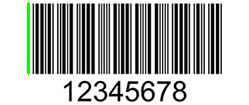

In [ ]:
image_path = "barcode.jpg"
image = cv2.imread(image_path)

if image is not None:
    detect_barcodes(image)
else:
    print("Failed to load the image:", image_path)

##Barcode detection in case the image is unreadable using deep learning

### Dataset

### Creation of a CNN model

In this code, we use the Sequential model from Keras and add the desired layers one by one. Each block consists of a convolutional layer (Conv2D), followed by batch normalization (BatchNormalization), rectified linear unit activation (Activation('relu')), and max pooling (MaxPooling2D).

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, BatchNormalization

# Build the CNN model
model = Sequential()

input_height = 128
input_width = 128
input_channels = 3

# Block 1
model.add(Conv2D(32, (3, 3), strides=(1, 1), padding='same', input_shape=(input_height, input_width, input_channels)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 2
model.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 3
model.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Block 4
model.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Print the model summary
model.summary()
